# [CDAF] Atividade 2

## Nome e matrícula
Nome: Diogo Tuler Chaves


Matrícula: 2022043663

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2023 do FBRef.

### Imports


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager
from matplotlib import font_manager as fm

## Questão 1
- Acesse os dados em https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e diferença de xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [2]:
data_raw = pd.read_csv("Scores_Fixtures_2023_Serie_A.csv")
data = data_raw.drop(['Notes','Match Report','Venue','Referee','Attendance','Time','Day'],axis=1).dropna().reset_index(drop=True)
data = data.query("Wk != 'Wk'").reset_index(drop=True)

In [3]:
xG_pro = {}
xG_contra = {}
xG_diferenca = {}

times = data["Home"].unique()

In [4]:
for t in times:
    
    data_time = data.query(f"Home == '{t}' or Away == '{t}'").reset_index(drop=True)
    
    values_xG = []
    values_xG_1 = []
    values_xG_dif = []

    contador = 0
    xG = 0
    xG_1 = 0 
    xG_dif = 0
    
    ultimo_indice = data_time.index.max()
    
    for indice,linha in data_time.iterrows():
        if linha["Home"] == t:
            xG = xG + float(linha['xG'])
            xG_1 = xG_1 + float(linha['xG.1'])
            xG_dif = xG_dif + (float(linha['xG']) - float(linha['xG.1']))
            
        elif linha["Away"] == t:
            xG = xG + float(linha['xG.1'])
            xG_1 = xG_1 + float(linha['xG'])
            xG_dif = xG_dif + (float(linha['xG.1']) - float(linha['xG']))
            
        contador = contador + 1
         
        if contador == 5 or ultimo_indice == indice:
            values_xG.append((round(xG/contador,2)))
            values_xG_1.append(round(xG_1/contador,2))
            values_xG_dif.append(round(xG_dif/contador,2))
            contador = 0
            xG = 0
            xG_1 = 0 
            xG_dif = 0
    
                
    xG_pro[t] = values_xG
    xG_contra[t] = values_xG_1
    xG_diferenca[t] = values_xG_dif



In [5]:
print("Valores do xG pró de cada time usando janela móvel de 5 jogos")
df_xG_pro = pd.DataFrame(xG_pro)
df_xG_pro['Media'] = df_xG_pro.mean(axis=1)
df_xG_pro.index = df_xG_pro.index * 5
df_xG_pro

Valores do xG pró de cada time usando janela móvel de 5 jogos


,América (MG),Palmeiras,Bragantino,Botafogo (RJ),Ath Paranaense,Fortaleza,Flamengo,Corinthians,Grêmio,Atlético Mineiro,...,Cuiabá,São Paulo,Internacional,Vasco da Gama,Santos,Coritiba,Goiás,Cruzeiro,Bahia,Media
0,1.48,2.18,1.58,1.52,0.90,2.20,2.02,0.92,1.18,1.60,...,0.82,1.64,0.94,1.06,1.36,0.86,0.88,1.54,1.10,1.3730
5,1.16,1.26,1.06,1.86,1.40,0.86,1.56,1.22,1.42,1.32,...,0.94,1.32,1.08,1.18,0.70,0.84,1.12,1.84,1.30,1.2270
10,1.42,1.50,1.78,1.16,2.16,1.32,0.82,0.74,2.20,1.06,...,1.00,1.36,0.96,1.42,1.28,1.30,1.18,0.82,1.06,1.2890
15,1.08,1.28,1.28,1.04,1.26,1.38,1.68,1.28,0.98,1.10,...,1.38,1.02,1.22,1.40,0.86,1.40,0.70,1.28,1.20,1.2190
20,1.16,0.98,1.74,0.98,1.38,1.80,0.78,0.86,1.00,1.06,...,0.98,1.66,0.72,1.54,1.44,0.82,0.74,0.90,1.62,1.1700
25,1.66,1.60,2.04,1.76,1.60,0.92,1.10,1.40,1.04,0.98,...,0.86,1.16,1.80,1.18,1.66,1.26,1.34,0.94,1.12,1.3410
30,1.02,1.34,1.26,1.02,0.96,1.24,1.42,0.86,1.32,1.54,...,0.96,0.96,0.96,1.00,0.50,0.84,0.98,1.06,1.46,1.0900
35,0.73,2.20,1.47,1.13,1.00,1.03,0.97,1.37,1.43,1.03,...,1.27,1.13,1.20,1.27,1.07,0.87,0.60,2.03,2.00,1.2535


In [6]:
print("Valores do xG contra de cada time usando janela móvel de 5 jogos")
df_xG_contra = pd.DataFrame(xG_contra)
df_xG_contra['Media'] = df_xG_contra.mean(axis=1)
df_xG_contra.index = df_xG_contra.index * 5
df_xG_contra

Valores do xG contra de cada time usando janela móvel de 5 jogos


,América (MG),Palmeiras,Bragantino,Botafogo (RJ),Ath Paranaense,Fortaleza,Flamengo,Corinthians,Grêmio,Atlético Mineiro,...,Cuiabá,São Paulo,Internacional,Vasco da Gama,Santos,Coritiba,Goiás,Cruzeiro,Bahia,Media
0,1.90,0.74,1.52,1.42,1.26,1.08,1.02,1.30,1.90,1.02,...,1.96,1.08,1.44,1.22,1.50,1.48,1.36,1.20,1.10,1.3730
5,1.58,0.84,1.16,0.90,1.06,1.26,1.46,0.98,1.28,0.94,...,0.98,0.98,1.42,1.42,1.18,1.68,1.44,1.30,1.40,1.2270
10,1.82,1.34,0.62,1.52,1.12,1.06,1.86,1.44,1.16,1.22,...,0.88,0.92,1.26,0.94,1.66,1.62,1.38,1.52,2.08,1.3140
15,1.14,1.36,1.14,1.08,1.30,1.18,1.50,1.56,1.18,1.18,...,1.04,1.38,1.30,1.16,1.24,1.44,0.80,1.08,0.82,1.2000
20,1.18,0.92,1.14,0.98,1.04,1.02,0.86,1.44,1.42,0.80,...,0.68,0.88,1.06,1.62,1.28,2.46,0.82,0.94,1.74,1.1640
25,1.84,0.66,1.36,1.58,0.92,1.52,0.80,1.08,2.02,1.02,...,1.42,1.02,1.54,1.06,1.62,1.40,1.48,0.86,1.50,1.3150
30,1.58,1.60,1.06,1.54,1.26,1.06,1.00,1.42,1.30,1.12,...,0.70,0.64,0.88,1.32,1.06,1.12,1.28,0.74,0.96,1.1160
35,2.60,0.67,0.87,1.27,2.23,0.93,0.83,1.00,1.27,1.43,...,1.30,0.70,0.93,1.00,1.10,1.67,1.07,1.13,1.10,1.2535


In [7]:
print("Valores de diferença de xG de cada time usando janela móvel de 5 jogos")
df_xG_diferenca = pd.DataFrame(xG_diferenca)
df_xG_diferenca['Media'] = df_xG_diferenca.mean(axis=1).round(7)
df_xG_diferenca.index = df_xG_diferenca.index * 5
df_xG_diferenca


Valores de diferença de xG de cada time usando janela móvel de 5 jogos


,América (MG),Palmeiras,Bragantino,Botafogo (RJ),Ath Paranaense,Fortaleza,Flamengo,Corinthians,Grêmio,Atlético Mineiro,...,Cuiabá,São Paulo,Internacional,Vasco da Gama,Santos,Coritiba,Goiás,Cruzeiro,Bahia,Media
0,-0.42,1.44,0.06,0.10,-0.36,1.12,1.00,-0.38,-0.72,0.58,...,-1.14,0.56,-0.50,-0.16,-0.14,-0.62,-0.48,0.34,0.00,0.0000
5,-0.42,0.42,-0.10,0.96,0.34,-0.40,0.10,0.24,0.14,0.38,...,-0.04,0.34,-0.34,-0.24,-0.48,-0.84,-0.32,0.54,-0.10,-0.0000
10,-0.40,0.16,1.16,-0.36,1.04,0.26,-1.04,-0.70,1.04,-0.16,...,0.12,0.44,-0.30,0.48,-0.38,-0.32,-0.20,-0.70,-1.02,-0.0250
15,-0.06,-0.08,0.14,-0.04,-0.04,0.20,0.18,-0.28,-0.20,-0.08,...,0.34,-0.36,-0.08,0.24,-0.38,-0.04,-0.10,0.20,0.38,0.0190
20,-0.02,0.06,0.60,-0.00,0.34,0.78,-0.08,-0.58,-0.42,0.26,...,0.30,0.78,-0.34,-0.08,0.16,-1.64,-0.08,-0.04,-0.12,0.0060
25,-0.18,0.94,0.68,0.18,0.68,-0.60,0.30,0.32,-0.98,-0.04,...,-0.56,0.14,0.26,0.12,0.04,-0.14,-0.14,0.08,-0.38,0.0260
30,-0.56,-0.26,0.20,-0.52,-0.30,0.18,0.42,-0.56,0.02,0.42,...,0.26,0.32,0.08,-0.32,-0.56,-0.28,-0.30,0.32,0.50,-0.0260
35,-1.87,1.53,0.60,-0.13,-1.23,0.10,0.13,0.37,0.17,-0.40,...,-0.03,0.43,0.27,0.27,-0.03,-0.80,-0.47,0.90,0.90,0.0005


In [8]:
def plot_dados(df,lim,title):
    sns.set_style("whitegrid")

    plt.figure(figsize=(12, 8))  
    cores = ['blue', 'black', 'green', 'red']

    plt.figure(figsize=(12, 8))  
    for i, equipe in enumerate(["Cruzeiro","Atlético Mineiro","Palmeiras" ,"Flamengo"]):
            sns.lineplot(data=df[equipe], dashes=False, color=cores[i], label=equipe)

    plt.plot((df.index), df['Media'], linestyle='--', color='gray', linewidth=2, label='Media Geral')

    plt.xlim(df.index.min(), df.index.max())
    plt.ylim(lim)  

    plt.legend(loc="upper right", fontsize=12)

    plt.title(title, fontsize=16)
    plt.xlabel('Rodada', fontsize=14)
    plt.ylabel('Valor Médio', fontsize=14)
    plt.tight_layout()
    plt.show()

<Figure size 1200x800 with 0 Axes>

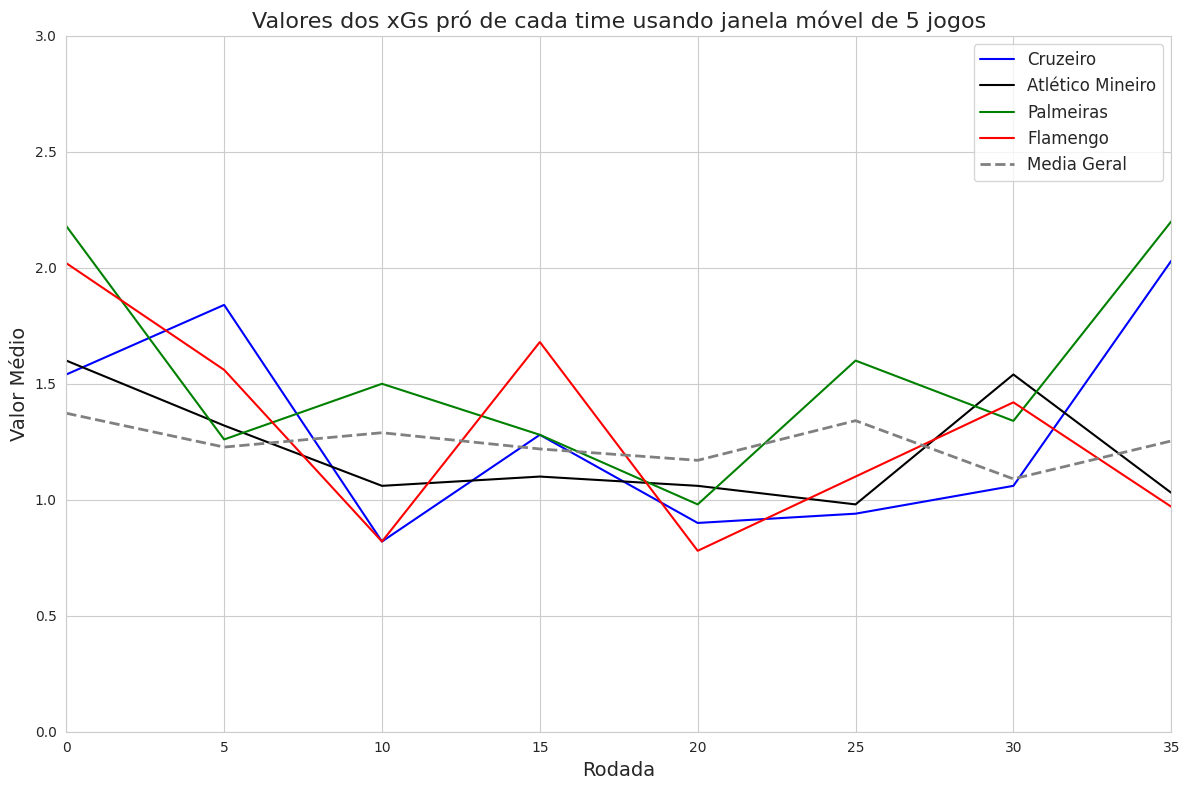

In [9]:
plot_dados(df_xG_pro,(0,3),'Valores dos xGs pró de cada time usando janela móvel de 5 jogos')

<Figure size 1200x800 with 0 Axes>

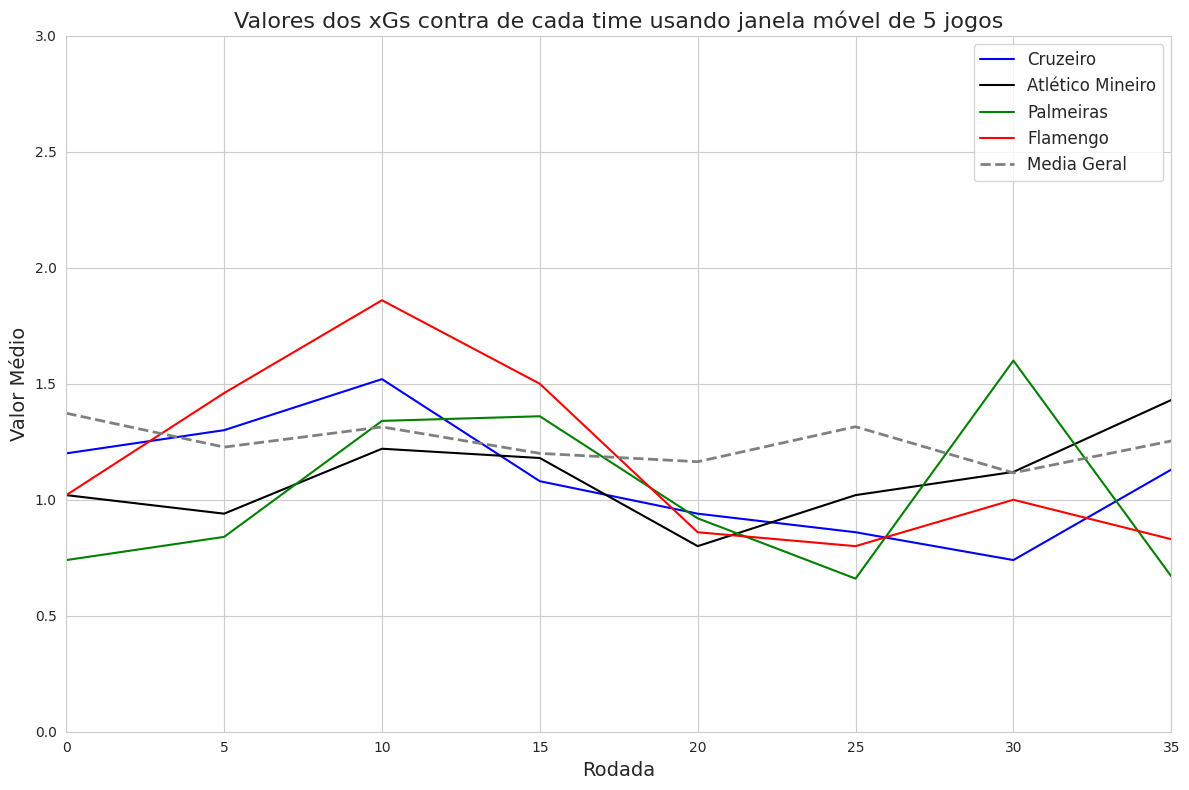

In [10]:
plot_dados((df_xG_contra),(0,3),'Valores dos xGs contra de cada time usando janela móvel de 5 jogos')

<Figure size 1200x800 with 0 Axes>

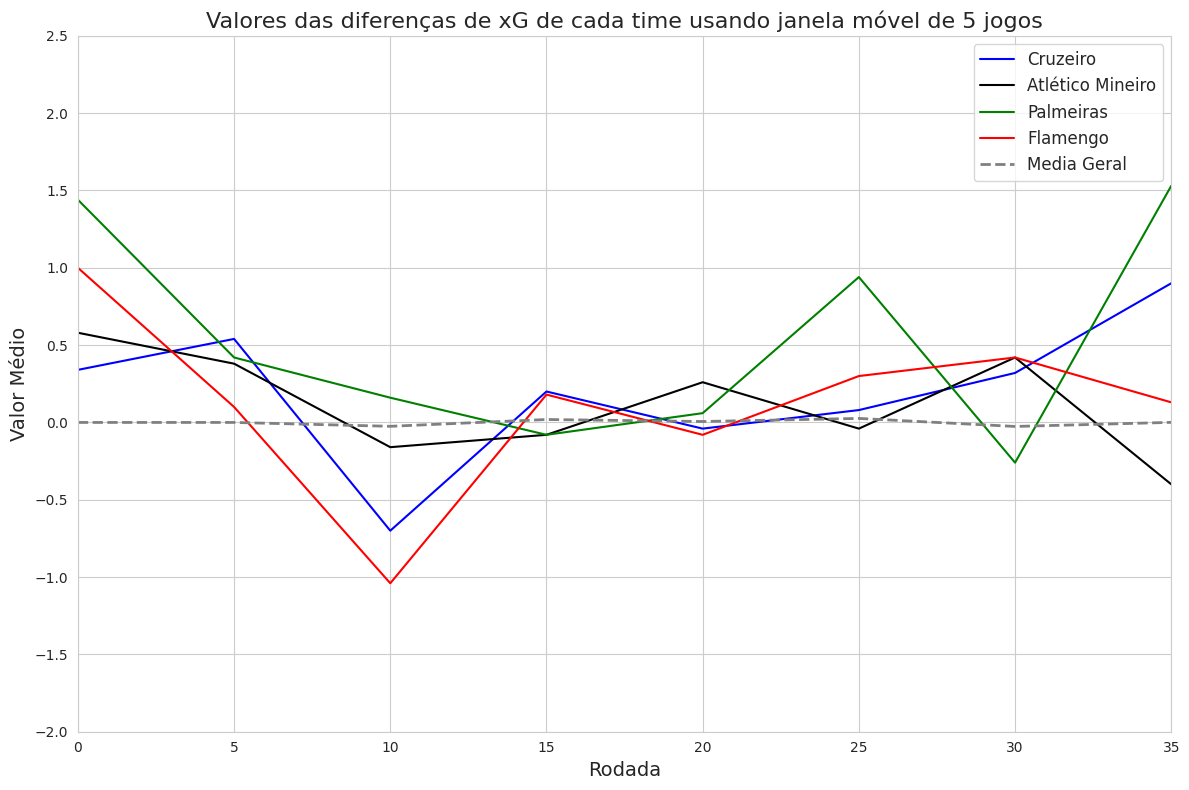

In [11]:
plot_dados(df_xG_diferenca,(-2,2.5),'Valores das diferenças de xG de cada time usando janela móvel de 5 jogos')

### O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?


        O Cruzeiro demonstrou uma qualidade defensiva consistente ao longo do campeonato, contrastando com sua baixa efetividade no setor ofensivo. Especialmente na segunda metade da competição, a equipe se destacou pela solidez na retaguarda. Por outro lado, o Atlético manteve uma boa performance defensiva durante toda a temporada, porém sua eficiência no ataque só se tornou expressiva nas últimas rodadas, após um período com desempenho ofensivo abaixo do esperado. O Palmeiras, que sagrou-se campeão do campeonato, destacou-se por uma ofensiva vigorosa ao longo de toda a competição, com um desempenho ainda mais notável nas etapas finais. No entanto, a equipe enfrentou dificuldades na linha defensiva próximo à rodada 30, evidenciando algumas falhas em sua organização defensiva.Já o Flamengo apresentou um padrão oscilante ao longo do campeonato, com dificuldades na consolidação de sua linha defensiva até a metade da competição. Apesar das oscilações, a equipe teve momentos de brilho, com picos de desempenho que contribuíram para sua boa classificação na tabela.

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela ao invés da outra?

In [12]:
xG_pro_10 = {}
xG_contra_10 = {}
xG_diferenca_10 = {}

In [13]:
for t in times:
    
    data_time = data.query(f"Home == '{t}' or Away == '{t}'").reset_index(drop=True)
    
    values_xG = []
    values_xG_1 = []
    values_xG_dif = []

    contador = 0
    xG = 0
    xG_1 = 0 
    xG_dif = 0
    
    ultimo_indice = data_time.index.max()
    
    for indice,linha in data_time.iterrows():
        if linha["Home"] == t:
            xG = xG + float(linha['xG'])
            xG_1 = xG_1 + float(linha['xG.1'])
            xG_dif = xG_dif + (float(linha['xG']) - float(linha['xG.1']))
            
        elif linha["Away"] == t:
            xG = xG + float(linha['xG.1'])
            xG_1 = xG_1 + float(linha['xG'])
            xG_dif = xG_dif + (float(linha['xG.1']) - float(linha['xG']))
            
        contador = contador + 1
         
        if contador == 10 or ultimo_indice == indice:
            values_xG.append((round(xG/contador,2)))
            values_xG_1.append(round(xG_1/contador,2))
            values_xG_dif.append(round(xG_dif/contador,2))
            contador = 0
            xG = 0
            xG_1 = 0 
            xG_dif = 0
    
            
    xG_pro_10[t] = values_xG
    xG_contra_10[t] = values_xG_1
    xG_diferenca_10[t] = values_xG_dif



In [14]:
print("Valores dos xGs pró de cada time usando janela móvel de 10 jogos")
df_xG_pro_10 = pd.DataFrame(xG_pro_10)
df_xG_pro_10['Media'] = df_xG_pro_10.mean(axis=1)
df_xG_pro_10.index = df_xG_pro_10.index * 10
df_xG_pro_10

Valores dos xGs pró de cada time usando janela móvel de 10 jogos


,América (MG),Palmeiras,Bragantino,Botafogo (RJ),Ath Paranaense,Fortaleza,Flamengo,Corinthians,Grêmio,Atlético Mineiro,...,Cuiabá,São Paulo,Internacional,Vasco da Gama,Santos,Coritiba,Goiás,Cruzeiro,Bahia,Media
0,1.32,1.72,1.32,1.69,1.15,1.53,1.79,1.07,1.30,1.46,...,0.88,1.48,1.01,1.12,1.03,0.85,1.00,1.69,1.20,1.3000
10,1.25,1.39,1.53,1.10,1.71,1.35,1.25,1.01,1.59,1.08,...,1.19,1.19,1.09,1.41,1.07,1.35,0.94,1.05,1.13,1.2540
20,1.41,1.29,1.89,1.37,1.49,1.36,0.94,1.13,1.02,1.02,...,0.92,1.41,1.26,1.36,1.55,1.04,1.04,0.92,1.37,1.2555
30,0.91,1.66,1.34,1.06,0.97,1.16,1.25,1.05,1.36,1.35,...,1.07,1.02,1.05,1.10,0.71,0.85,0.84,1.43,1.66,1.1500


In [15]:
print("Valores dos xGs contra de cada time usando janela móvel de 10 jogos")
df_xG_contra_10 = pd.DataFrame(xG_contra_10)
df_xG_contra_10['Media'] = df_xG_contra_10.mean(axis=1)
df_xG_contra_10.index = df_xG_contra_10.index * 10
df_xG_contra_10

Valores dos xGs contra de cada time usando janela móvel de 10 jogos


,América (MG),Palmeiras,Bragantino,Botafogo (RJ),Ath Paranaense,Fortaleza,Flamengo,Corinthians,Grêmio,Atlético Mineiro,...,Cuiabá,São Paulo,Internacional,Vasco da Gama,Santos,Coritiba,Goiás,Cruzeiro,Bahia,Media
0,1.74,0.79,1.34,1.16,1.16,1.17,1.24,1.14,1.59,0.98,...,1.47,1.03,1.43,1.32,1.34,1.58,1.40,1.25,1.25,1.3000
10,1.48,1.35,0.88,1.30,1.21,1.12,1.68,1.50,1.17,1.20,...,0.96,1.15,1.28,1.05,1.45,1.53,1.09,1.30,1.45,1.2570
20,1.51,0.79,1.25,1.28,0.98,1.27,0.83,1.26,1.72,0.91,...,1.05,0.95,1.30,1.34,1.45,1.93,1.15,0.90,1.62,1.2395
30,1.96,1.25,0.99,1.44,1.62,1.01,0.94,1.26,1.29,1.24,...,0.93,0.66,0.90,1.20,1.07,1.32,1.20,0.89,1.01,1.1670


In [16]:
print("Valores das diferenças de xG de cada time usando janela móvel de 10 jogos")
df_xG_diferenca_10 = pd.DataFrame(xG_diferenca_10)
df_xG_diferenca_10['Media'] = df_xG_diferenca_10.mean(axis=1).round(7)
df_xG_diferenca_10.index = df_xG_diferenca_10.index * 10
df_xG_diferenca_10


Valores das diferenças de xG de cada time usando janela móvel de 10 jogos


,América (MG),Palmeiras,Bragantino,Botafogo (RJ),Ath Paranaense,Fortaleza,Flamengo,Corinthians,Grêmio,Atlético Mineiro,...,Cuiabá,São Paulo,Internacional,Vasco da Gama,Santos,Coritiba,Goiás,Cruzeiro,Bahia,Media
0,-0.42,0.93,-0.02,0.53,-0.01,0.36,0.55,-0.07,-0.29,0.48,...,-0.59,0.45,-0.42,-0.20,-0.31,-0.73,-0.40,0.44,-0.05,0.000
10,-0.23,0.04,0.65,-0.20,0.50,0.23,-0.43,-0.49,0.42,-0.12,...,0.23,0.04,-0.19,0.36,-0.38,-0.18,-0.15,-0.25,-0.32,-0.003
20,-0.10,0.50,0.64,0.09,0.51,0.09,0.11,-0.13,-0.70,0.11,...,-0.13,0.46,-0.04,0.02,0.10,-0.89,-0.11,0.02,-0.25,0.016
30,-1.05,0.41,0.35,-0.37,-0.65,0.15,0.31,-0.21,0.07,0.11,...,0.15,0.36,0.15,-0.10,-0.36,-0.47,-0.36,0.54,0.65,-0.016


<Figure size 1200x800 with 0 Axes>

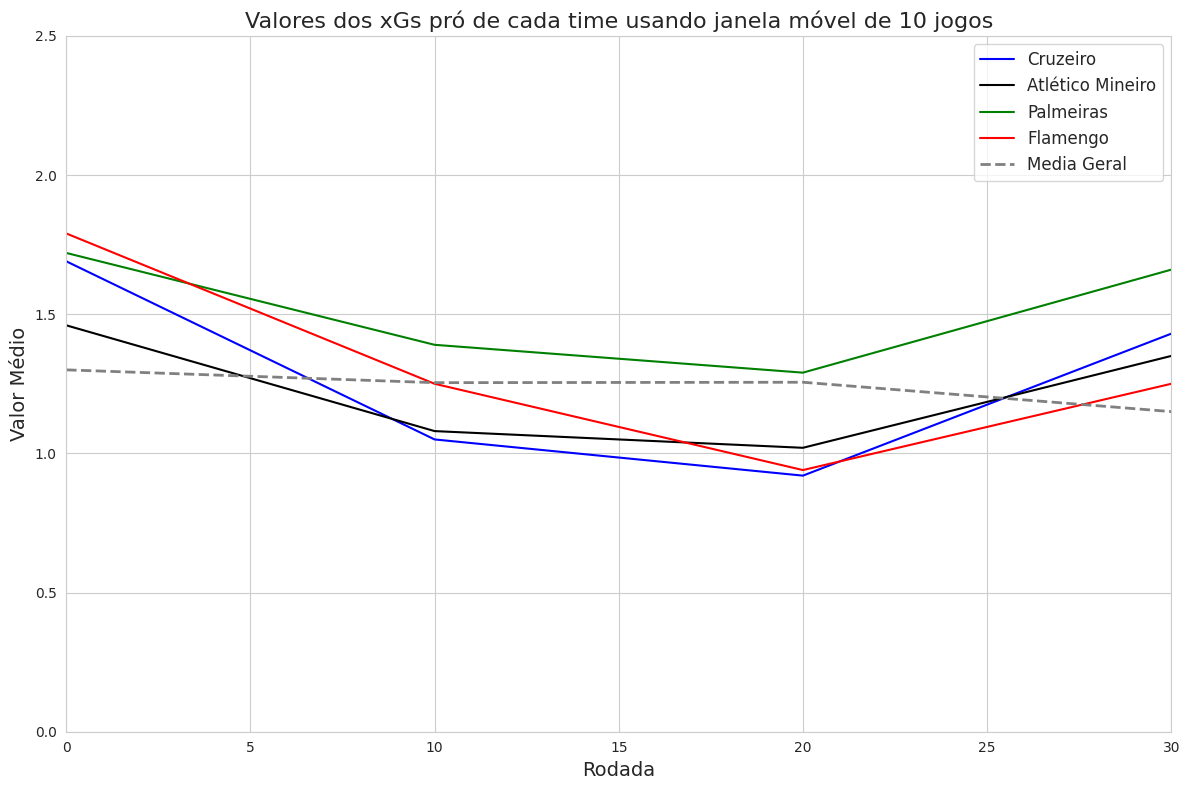

In [17]:
plot_dados(df_xG_pro_10,(0,2.5),'Valores dos xGs pró de cada time usando janela móvel de 10 jogos')

<Figure size 1200x800 with 0 Axes>

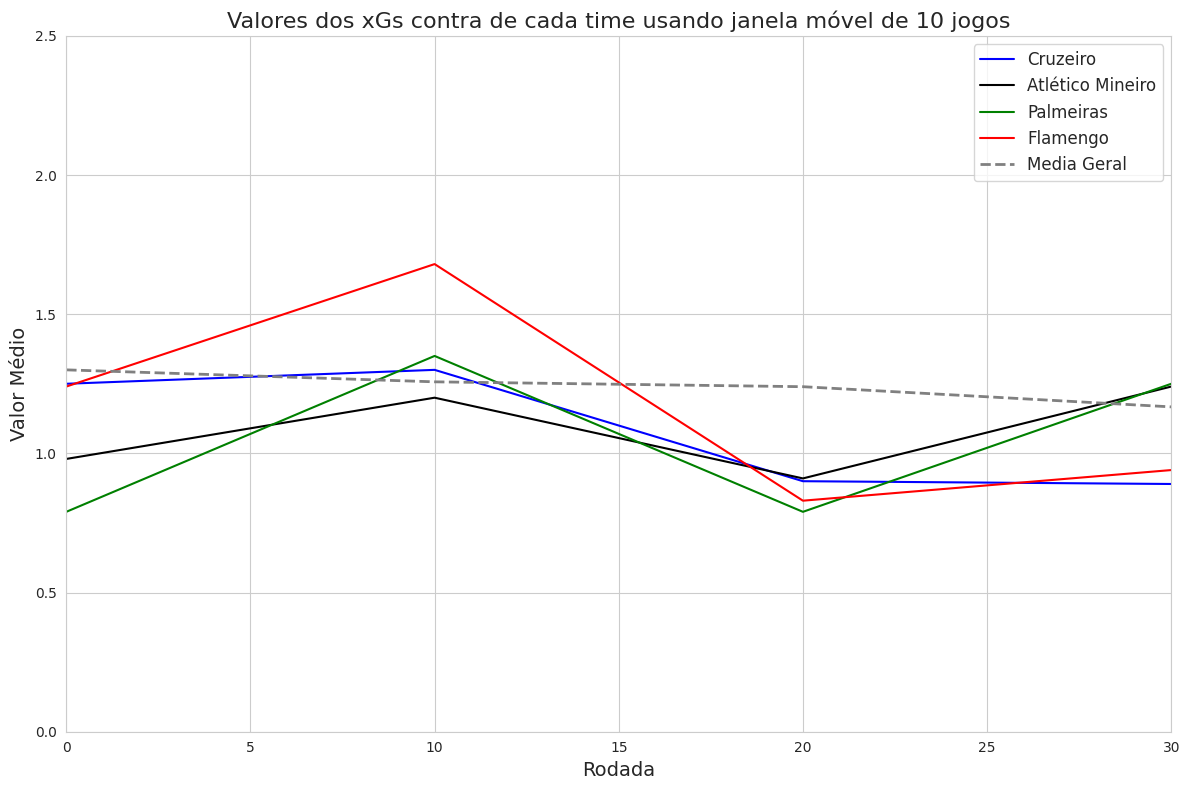

In [18]:
plot_dados((df_xG_contra_10),(0,2.5),'Valores dos xGs contra de cada time usando janela móvel de 10 jogos')

<Figure size 1200x800 with 0 Axes>

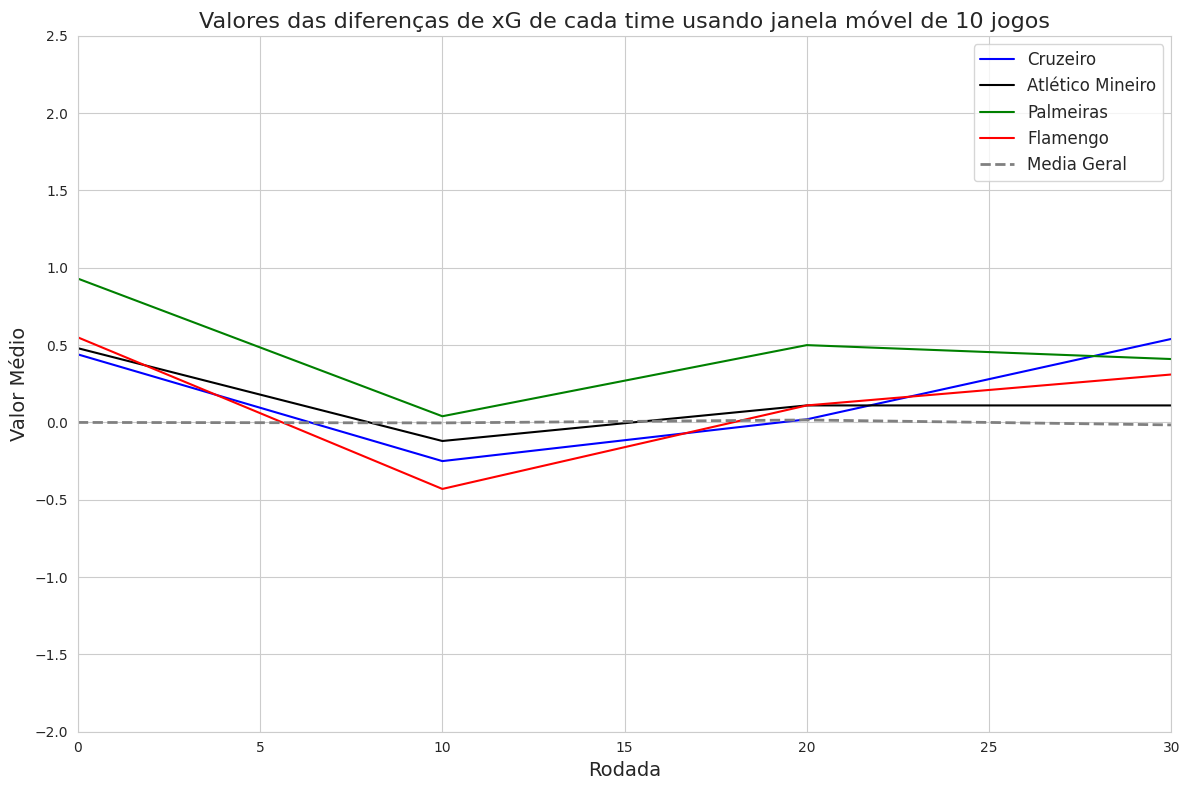

In [19]:
plot_dados(df_xG_diferenca_10,(-2,2.5),'Valores das diferenças de xG de cada time usando janela móvel de 10 jogos')

#### Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela ao invés da outra?

    A suavidade da curva da série com 10 jogos é notavelmente maior, possibilitando uma análise mais abrangente d   o desempenho da equipe ao longo do campeonato. Isso torna mais fácil compreender a classificação de cada time no campeonato, oferecendo uma visão geral mais ampla da competição. Por outro lado, a série com janela de 5 jogos oferece um nível de detalhamento maior para cada rodada, sendo especialmente útil para analisar falhas ou acertos específicos das equipes em cada etapa do campeonato.

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2023/stats/2023-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios a partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

    Para avaliar o desempenho de um jogador ofensivamente, escolhi analisar os seguintes atributos da temporada do Campeonato Brasileiro de 2023:

- **xG** Como atacante, é crucial que o jogador marque gols. Portanto, é importante analisar a expectativa de gols.
- **xAG** Como atacante, é crucial que o jogador ajude a marcar gols. Portanto, é importante analisar a expectativa de assistências.
- **Gls** Como atacante, é crucial que o jogador marque gols. Portanto, é importante analisar os gols.
- **Ast** Como atacante, é crucial que o jogador ajude a marcar gols. Portanto, é importante analisar as assistências.
- **SoT** Como atacante, é crucial que o jogador tenham uma quantidade satisfatória de chutes no gol e relacionar com a quantidade de gols. Portanto, é importante analisar a quantidade de chutes no gol.
- **GCA** Como atacante, é crucial que o jogador tenha atitudes que ajudam na criação de gols. Portanto, é importante analisar a quantidade média a quantidade de criação de gols.


    A escala é em porcentagem, comparada com o maior valor desse atributo presente na tabela, excluindo os jogadores que jogaram menos de 360 horas. Para isso, foi realizada uma normalização multiplicando o valor por 100 para obter a porcentagem. A normalização foi realizada com base no tempo em que o time está com a posse de bola.

In [20]:
data_geral_times = pd.read_csv("Geral_times_2023.csv")

data_geral = pd.read_csv("Geral_jogadores_2023.csv")
data_geral = data_geral.query("Player != 'Player'").reset_index(drop=True)
data_geral.drop('Unnamed: 0', axis=1,inplace=True)

data_creation = pd.read_csv("Goal_and_Shot_Creation_2023.csv")
data_creation = data_creation.query("Player != 'Player'").reset_index(drop=True)

data_shot = pd.read_csv("Shooting_2023.csv")
data_shot = data_shot.query("Player != 'Player'").reset_index(drop=True)

if data_geral['Rk'].dtype != int:
    data_geral['Rk'] = data_geral['Rk'].astype(float).astype(int)

if data_creation['Rk'].dtype != int:
    data_creation['Rk'] = data_creation['Rk'].astype(int)
    
if data_shot['Rk'].dtype != int:
    data_shot['Rk'] = data_creation['Rk'].astype(int)

In [21]:
data_geral

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
0,1,Nicolás Acevedo,uy URU,MF,Bahia,23.00,"1,999.00",31.00,21.00,"1,970.00",...,0.00,0.00,0.00,0.00,0.04,0.05,0.10,0.04,0.10,Matches
1,2,Luiz Adriano,br BRA,FW,Internacional,35.00,"1,987.00",29.00,17.00,"1,330.00",...,0.07,0.27,0.20,0.27,0.18,0.09,0.27,0.18,0.27,Matches
2,3,Adriel,br BRA,GK,Grêmio,22.00,"2,001.00",2.00,2.00,180.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
3,4,Adryelson,br BRA,DF,Botafogo (RJ),24.00,"1,998.00",35.00,35.00,"2,996.00",...,0.03,0.06,0.03,0.06,0.03,0.01,0.04,0.03,0.04,Matches
4,5,Adson,br BRA,"FW,MF",Corinthians,22.00,"2,000.00",15.00,9.00,857.00,...,0.11,0.11,0.00,0.11,0.04,0.11,0.15,0.04,0.15,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,748,Yago,br BRA,MF,Bahia,27.00,"1,995.00",25.00,16.00,"1,363.00",...,0.00,0.00,0.00,0.00,0.03,0.04,0.07,0.03,0.07,Matches
748,749,Vinícius Zanocelo,br BRA,"MF,FW",Fortaleza,22.00,"2,001.00",6.00,0.00,81.00,...,0.00,0.00,0.00,0.00,0.34,0.00,0.34,0.34,0.34,Matches
749,750,Bruno Zapelli,ar ARG,"MF,FW",Ath Paranaense,20.00,"2,002.00",21.00,13.00,"1,143.00",...,0.16,0.31,0.16,0.31,0.19,0.14,0.34,0.19,0.34,Matches
750,751,Federico Zaracho,ar ARG,"MF,FW",Atlético Mineiro,24.00,"1,998.00",27.00,22.00,"1,947.00",...,0.05,0.14,0.09,0.14,0.14,0.08,0.22,0.14,0.22,Matches


In [22]:
posse_times = data_geral_times[["Squad","Poss"]]
posse_time_jogador = data_geral[["Rk","Player","Squad","Min"]]
for index, value in posse_time_jogador['Min'].items():
    posse_time_jogador.at[index, 'Min'] = float(str(value).replace(',', ''))
posse_time_jogador

for index, value in posse_time_jogador.iterrows():
    min_value = value["Min"]
    squad_name = value["Squad"]
    squad_possession = posse_times.loc[posse_times["Squad"] == squad_name, "Poss"].values[0]
    posse_time_jogador.at[index, "Min"] = (min_value * (squad_possession/100)).round(2)

posse_time_jogador_jogo = posse_time_jogador
posse_time_jogador_jogo['Min'] = posse_time_jogador['Min'].div(90.0)

posse_time_jogador_jogo

analise_ataque_aux = pd.merge(data_geral[['Rk','Squad','Player','xG','xAG','Gls','Ast']] , data_creation[['Rk','GCA']], on='Rk')
analise_ataque_1 = pd.merge(analise_ataque_aux, data_shot[['Rk','SoT']], on='Rk')
analise_ataque = pd.merge(analise_ataque_1, posse_time_jogador_jogo[['Rk','Min']], on='Rk')


analise_ataque[["xG","xAG","Gls","Ast","GCA","SoT","Min"]] = analise_ataque[["xG","xAG","Gls","Ast","GCA","SoT","Min"]].astype(float)

analise_ataque = analise_ataque.query("Min >= 2.0").reset_index(drop=True)
analise_ataque

/tmp/ipykernel_63705/1098724353.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posse_time_jogador_jogo['Min'] = posse_time_jogador['Min'].div(90.0)


,Rk,Squad,Player,xG,xAG,Gls,Ast,GCA,SoT,Min
0,1,Bahia,Nicolás Acevedo,0.9,1.2,0.0,0.0,0.0,4.0,10.878778
1,2,Internacional,Luiz Adriano,2.6,1.3,3.0,1.0,2.0,11.0,7.625333
2,4,Botafogo (RJ),Adryelson,1.1,0.3,1.0,1.0,2.0,5.0,16.012000
3,5,Corinthians,Adson,0.4,1.0,0.0,1.0,3.0,3.0,4.646889
4,9,Corinthians,Yuri Alberto,10.0,2.7,8.0,3.0,9.0,28.0,14.759333
...,...,...,...,...,...,...,...,...,...,...
486,745,Goiás,Willian,0.9,0.6,0.0,0.0,2.0,2.0,10.867556
487,747,Fluminense,Samuel Xavier,0.9,2.9,1.0,2.0,5.0,3.0,14.428111
488,748,Bahia,Yago,0.4,0.6,0.0,0.0,1.0,4.0,7.526778
489,750,Ath Paranaense,Bruno Zapelli,2.5,1.8,2.0,2.0,7.0,5.0,6.159556


In [23]:
analise_ataque[["xG","xAG","Gls","Ast","GCA","SoT"]] = (analise_ataque[["xG","xAG","Gls","Ast","GCA","SoT"]].div(analise_ataque["Min"], axis=0)).round(3)
maximos = analise_ataque[["xG","xAG","Gls","Ast","GCA","SoT"]].max()
analise_ataque[["xG","xAG","Gls","Ast","GCA","SoT"]] = (analise_ataque[["xG","xAG","Gls","Ast","GCA","SoT"]].div(maximos)*100).round(3)

analise_ataque

,Rk,Squad,Player,xG,xAG,Gls,Ast,GCA,SoT,Min
0,1,Bahia,Nicolás Acevedo,6.661,14.379,0.000,0.000,0.000,10.174,10.878778
1,2,Internacional,Luiz Adriano,27.368,22.222,27.197,6.935,7.925,39.895,7.625333
2,4,Botafogo (RJ),Adryelson,5.538,2.484,4.291,3.282,3.781,8.626,16.012000
3,5,Corinthians,Adson,6.902,28.105,0.000,11.382,19.540,17.860,4.646889
4,9,Corinthians,Yuri Alberto,54.414,23.922,37.509,10.746,18.451,52.447,14.759333
...,...,...,...,...,...,...,...,...,...,...
486,745,Goiás,Willian,6.661,7.190,0.000,0.000,5.566,5.087,10.867556
487,747,Fluminense,Samuel Xavier,4.976,26.275,4.775,7.358,10.496,5.751,14.428111
488,748,Bahia,Yago,4.254,10.458,0.000,0.000,4.023,14.681,7.526778
489,750,Ath Paranaense,Bruno Zapelli,32.584,38.170,22.491,17.205,34.362,22.450,6.159556


In [24]:
dados_ataque = analise_ataque.query("Player == 'Endrick' or Player == 'John Kennedy' or (Player == 'Paulinho' and Squad == 'Atlético Mineiro')")
dados_ataque

,Rk,Squad,Player,xG,xAG,Gls,Ast,GCA,SoT,Min
126,211,Palmeiras,Endrick,71.268,25.752,83.460,0.000,29.855,75.753,9.123000
235,367,Fluminense,John Kennedy,53.852,29.281,44.221,5.611,9.649,64.777,9.390556
348,533,Atlético Mineiro,Paulinho,68.138,18.562,78.893,6.035,13.793,74.039,17.547222


In [25]:
colunas_numericas = dados_ataque[["xG","xAG","Gls","Ast","GCA","SoT"]]
percentiles = colunas_numericas.values.tolist()
percentiles

[[71.268, 25.752, 83.46, 0.0, 29.855, 75.753],
 [53.852, 29.281, 44.221, 5.611, 9.649, 64.777],
 [68.138, 18.562, 78.893, 6.035, 13.793, 74.039]]

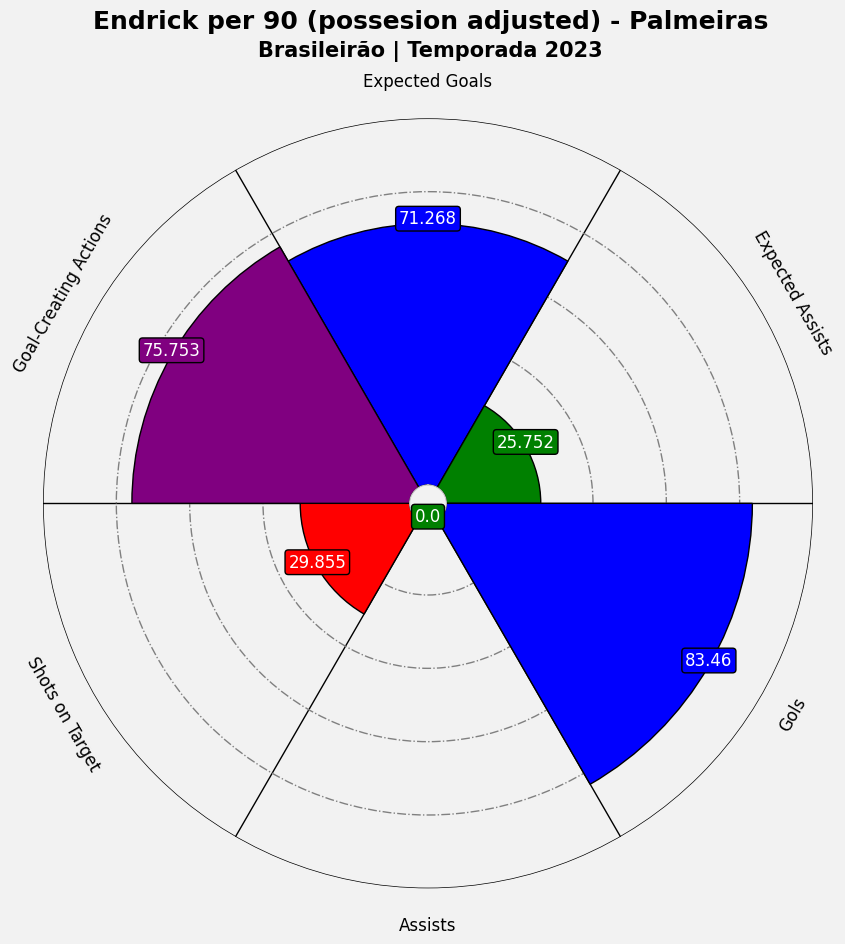

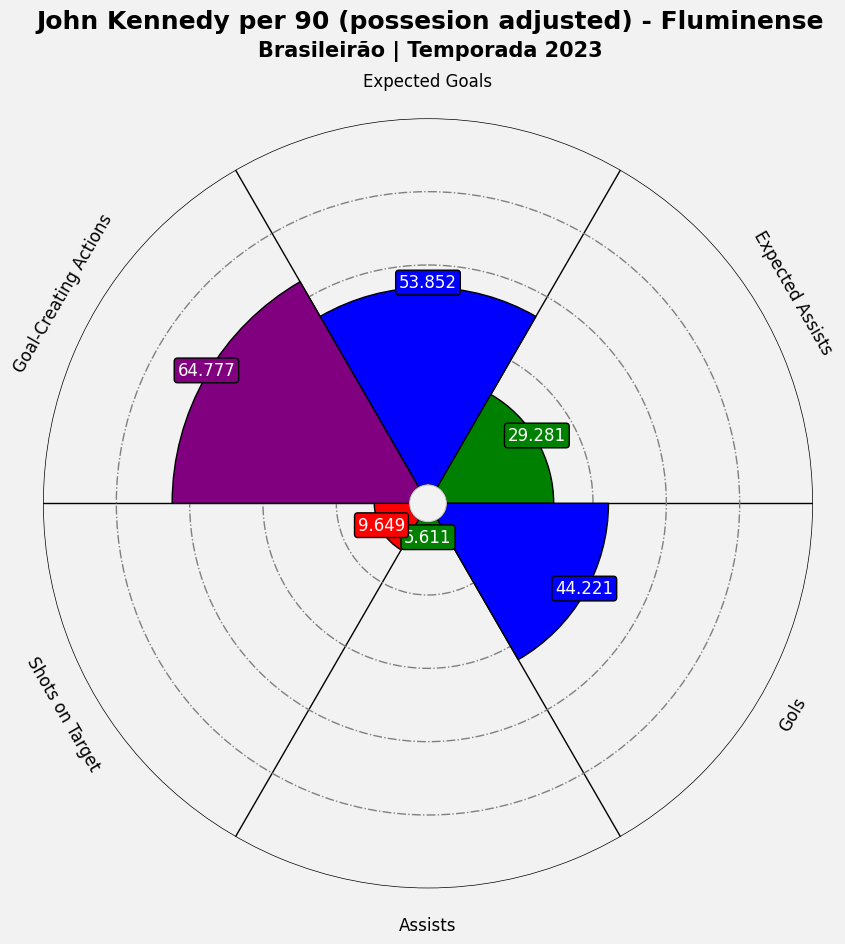

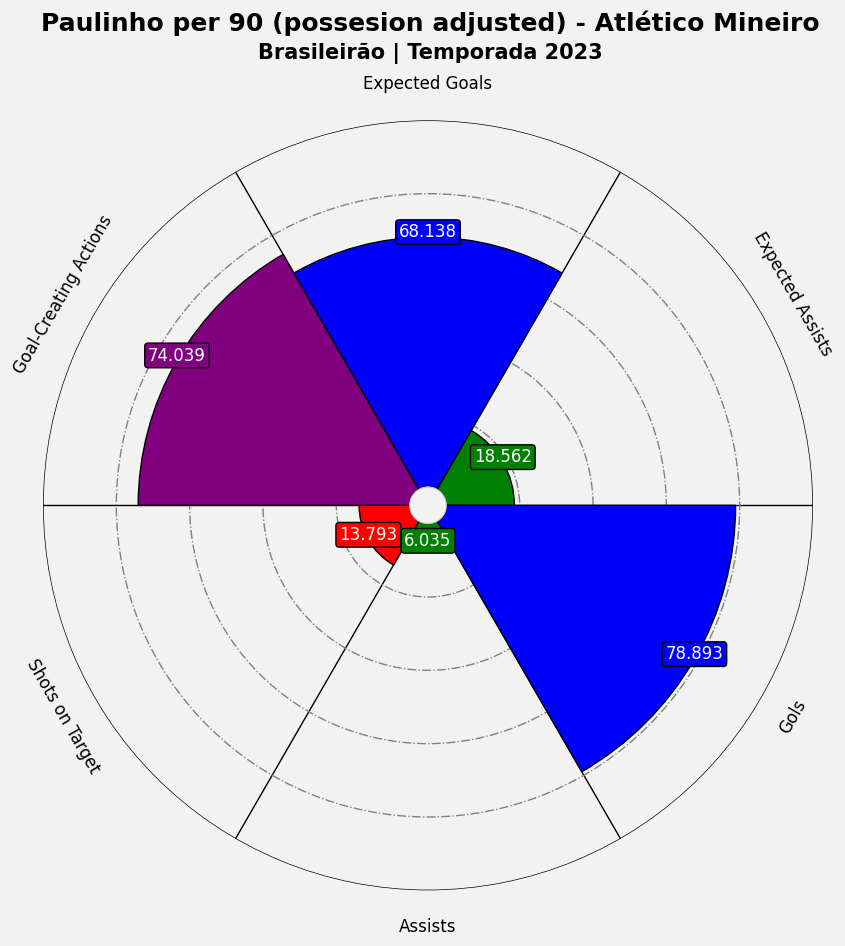

In [26]:
names = ["Expected Goals", "Expected Assists", "Gols", 
         "Assists", "Shots on Target", "Goal-Creating Actions"]
slice_colors = ["blue"] + ["green"] + ["blue"] + ["green"] + ["red"] + ["purple"]
text_colors = ["white"] * 6

font_normal = fm.FontProperties(family='sans-serif', style='normal', weight='normal', size=12)
font_bold = fm.FontProperties(family='sans-serif', style='normal', weight='bold', size=12)

baker = PyPizza(
    params=names,
    min_range=None, 
    max_range=None, 
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1,
    other_circle_ls="-."
)

for i, jogador in enumerate(dados_ataque['Player']):
    fig, ax = baker.make_pizza(
        percentiles[i],
        figsize=(10, 10),
        param_location=110,
        slice_colors=slice_colors,
        value_colors=text_colors,
        value_bck_colors=slice_colors,
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal, va="center"  #
        ),
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )
    )    
    time = str(dados_ataque.query(f"Player == '{jogador}'")['Squad'].values[0])
    fig.text(
        0.515, 0.97, f"{jogador} per 90 (possesion adjusted) - {time}",
        size=18, ha="center", fontproperties=font_bold, color="#000000"
    )

    fig.text(
        0.515, 0.942,
        "Brasileirão | Temporada 2023",
        size=15, ha="center", fontproperties=font_bold, color="#000000"
    )

    plt.show()

#### Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.

    Tanto o Endrick quanto o Paulinho possuem ofensivas muito maiores do que a do John Kennedy, o que faz total sentido, pois são jogadores mais valiosos para suas equipes. É interessante notar que ambos possuem alta capacidade de criação e conversão de gols e, como seu expected goals é menor que a taxa de gols, eles provavelmente têm o costume de marcar gols difíceis. Outro ponto relevante é que Paulinho foi artilheiro do campeonato, porém, ao normalizar sua quantidade de gols por 90 minutos, ele marcou apenas 80% dos gols do jogador com mais gols em 90 minutos normalizado, sugerindo que o Atlético provavelmente possui uma posse de bola maior e que Paulinho provavelmente possui mais horas em campo. Além disso, Endrick consegue realizar passes que aumentam sua expected assists, porém ainda não registrou nenhuma assistência, sendo a questão das assistências um ponto fraco dos três jogadores. É possível observar também que Endrick tem mais chutes a gol do que os outros dois, o que indica que ele provavelmente tenta mais chutes ou que sua equipe o coloca em melhores posições para finalizar. Apesar de ter características ofensivas menos destacadas, é interessante notar que John Kennedy possui uma alta capacidade de criação de jogadas de gol, o que é uma qualidade valiosa em um jogador ofensivo, sendo sua expected assists a maior entre os três. No entanto, cabe a ele converter mais gols e assistências.

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

    Para avaliar o desempenho de um meio campista, escolhi analisar os seguintes atributos da temporada do Campeonato Brasileiro de 2023:

- **Cmp** Como meio campista, é crucial que o jogador acerte passes. Portanto, é importante analisar a quantidade de passes certos.
- **xAG** Como meio campista, é crucial que o seus passes gerem gols. Portanto, é importante analisar a expectativa de assistências.
- **GCA** Como meio campista, é crucial que o jogador tenha atitudes que ajudam na criação de gols. Portanto, é importante analisar a quantidade média de atitudes de criação de gols.
- **Tkl+Int** Como meio campista, é crucial que o jogador tenha atitudes defensivas. Portanto, é importante analisar a quantidade de desarmes e intercepções.
- **Sh** Como meio campista, é crucial que o jogador tenha atitudes defensivas. Portanto, é importante analisar a quantidade de chutes bloqueados.
- **Pass** Como meio campista, é crucial que o jogador tenha atitudes defensivas. Portanto, é importante analisar a quantidade de passes bloqueados.


    A escala é em porcentagem, comparada com o maior valor desse atributo presente na tabela, excluindo os jogadores que jogaram menos de 360 horas. Para isso, foi realizada uma normalização multiplicando o valor por 100 para obter a porcentagem. A normalização foi realizada com base no tempo em que o time está com a posse de bola.

In [27]:
data_pass = pd.read_csv("Pass_csv.csv")
data_pass = data_pass.query("Player != 'Player'").reset_index(drop=True)

data_defense = pd.read_csv("Defense_2023.csv")
data_defense = data_defense.query("Player != 'Player'").reset_index(drop=True)

if data_pass['Rk'].dtype != int:
    data_pass['Rk'] = data_pass['Rk'].astype(float).astype(int)

if data_defense['Rk'].dtype != int:
    data_defense['Rk'] = data_defense['Rk'].astype(int)

In [28]:
data_defense

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Matches
0,1,Nicolás Acevedo,uy URU,MF,Bahia,23,1999,21.9,73,46,...,47.1,45,31,1,30,26,99,22,1,Matches
1,2,Luiz Adriano,br BRA,FW,Internacional,35,1987,14.8,12,7,...,28.6,5,9,2,7,9,21,18,0,Matches
2,3,Adriel,br BRA,GK,Grêmio,22,2001,2.0,0,0,...,NaN,0,0,0,0,0,0,0,0,Matches
3,4,Adryelson,br BRA,DF,Botafogo (RJ),24,1998,33.3,34,20,...,65.4,9,43,30,13,61,95,202,2,Matches
4,5,Adson,br BRA,"FW,MF",Corinthians,22,2000,9.5,33,26,...,57.1,9,16,2,14,8,41,1,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,748,Yago,br BRA,MF,Bahia,27,1995,15.1,45,25,...,42.6,31,22,2,20,16,61,14,1,Matches
748,749,Vinícius Zanocelo,br BRA,"MF,FW",Fortaleza,22,2001,0.9,1,1,...,25.0,3,2,1,1,3,4,3,0,Matches
749,750,Bruno Zapelli,ar ARG,"MF,FW",Ath Paranaense,20,2002,12.7,16,7,...,59.1,9,17,1,16,7,23,3,0,Matches
750,751,Federico Zaracho,ar ARG,"MF,FW",Atlético Mineiro,24,1998,21.6,71,42,...,29.3,65,29,4,25,31,102,22,0,Matches


In [29]:
analise_meio_aux = pd.merge(data_geral[['Rk','Squad','Player','xAG']] , data_creation[['Rk','GCA']], on='Rk')
analise_meio_1 = pd.merge(analise_meio_aux, data_pass[['Rk','Cmp']], on='Rk')
analise_meio_2 =  pd.merge(analise_meio_1, data_defense[['Rk','Tkl+Int','Sh','Pass']], on='Rk')
analise_meio = pd.merge(analise_meio_2, posse_time_jogador_jogo[['Rk','Min']], on='Rk')


analise_meio[["Cmp","xAG","GCA","Tkl+Int","Sh","Pass","Min"]] = analise_meio[["Cmp","xAG","GCA","Tkl+Int","Sh","Pass","Min"]].astype(float)

analise_meio = analise_meio.query("Min >= 2.0").reset_index(drop=True)
analise_meio

,Rk,Squad,Player,xAG,GCA,Cmp,Tkl+Int,Sh,Pass,Min
0,1,Bahia,Nicolás Acevedo,1.2,0.0,1029.0,99.0,1.0,30.0,10.878778
1,2,Internacional,Luiz Adriano,1.3,2.0,208.0,21.0,2.0,7.0,7.625333
2,4,Botafogo (RJ),Adryelson,0.3,2.0,1303.0,95.0,30.0,13.0,16.012000
3,5,Corinthians,Adson,1.0,3.0,315.0,41.0,2.0,14.0,4.646889
4,9,Corinthians,Yuri Alberto,2.7,9.0,417.0,26.0,2.0,21.0,14.759333
...,...,...,...,...,...,...,...,...,...,...
486,745,Goiás,Willian,0.6,2.0,885.0,104.0,15.0,15.0,10.867556
487,747,Fluminense,Samuel Xavier,2.9,5.0,1182.0,45.0,12.0,15.0,14.428111
488,748,Bahia,Yago,0.6,1.0,569.0,61.0,2.0,20.0,7.526778
489,750,Ath Paranaense,Bruno Zapelli,1.8,7.0,438.0,23.0,1.0,16.0,6.159556


In [30]:
analise_meio[["Cmp","xAG","GCA","Tkl+Int","Sh","Pass"]] = (analise_meio[["Cmp","xAG","GCA","Tkl+Int","Sh","Pass"]].div(analise_meio["Min"], axis=0)).round(3)
maximos = analise_meio[["Cmp","xAG","GCA","Tkl+Int","Sh","Pass"]].max()
analise_meio[["Cmp","xAG","GCA","Tkl+Int","Sh","Pass"]] = (analise_meio[["Cmp","xAG","GCA","Tkl+Int","Sh","Pass"]].div(maximos)*100).round(3)

analise_meio

,Rk,Squad,Player,xAG,GCA,Cmp,Tkl+Int,Sh,Pass,Min
0,1,Bahia,Nicolás Acevedo,14.379,0.000,69.029,56.441,2.621,61.099,10.878778
1,2,Internacional,Luiz Adriano,22.222,7.925,19.906,17.081,7.464,20.337,7.625333
2,4,Botafogo (RJ),Adryelson,2.484,3.781,59.387,36.798,53.390,17.988,16.012000
3,5,Corinthians,Adson,28.105,19.540,49.470,54.723,12.251,66.748,4.646889
4,9,Corinthians,Yuri Alberto,23.922,18.451,20.619,10.928,3.875,31.524,14.759333
...,...,...,...,...,...,...,...,...,...,...
486,745,Goiás,Willian,7.190,5.566,59.430,59.356,39.316,30.572,10.867556
487,747,Fluminense,Samuel Xavier,26.275,10.496,59.786,19.345,23.704,23.039,14.428111
488,748,Bahia,Yago,10.458,4.023,55.169,50.264,7.578,58.861,7.526778
489,750,Ath Paranaense,Bruno Zapelli,38.170,34.362,51.894,23.159,4.615,57.554,6.159556


In [31]:
dados_meio = analise_meio.query("Player == 'Giorgian De Arrascaeta' or Player == 'Raphael Veiga' or Player == 'Machado'")
dados_meio

,Rk,Squad,Player,xAG,GCA,Cmp,Tkl+Int,Sh,Pass,Min
104,174,Flamengo,Giorgian De Arrascaeta,62.353,30.883,48.019,22.700,2.422,20.735,11.747889
261,405,Cruzeiro,Machado,18.039,9.286,58.923,33.796,10.940,22.109,13.029556
462,703,Palmeiras,Raphael Veiga,64.575,27.374,45.473,14.681,0.000,18.498,14.363667


In [32]:
colunas_numericas_2 = dados_meio[["xAG","GCA","Cmp","Tkl+Int","Sh","Pass"]]
percentiles_meio = colunas_numericas_2.values.tolist()
percentiles_meio

[[62.353, 30.883, 48.019, 22.7, 2.422, 20.735],
 [18.039, 9.286, 58.923, 33.796, 10.94, 22.109],
 [64.575, 27.374, 45.473, 14.681, 0.0, 18.498]]

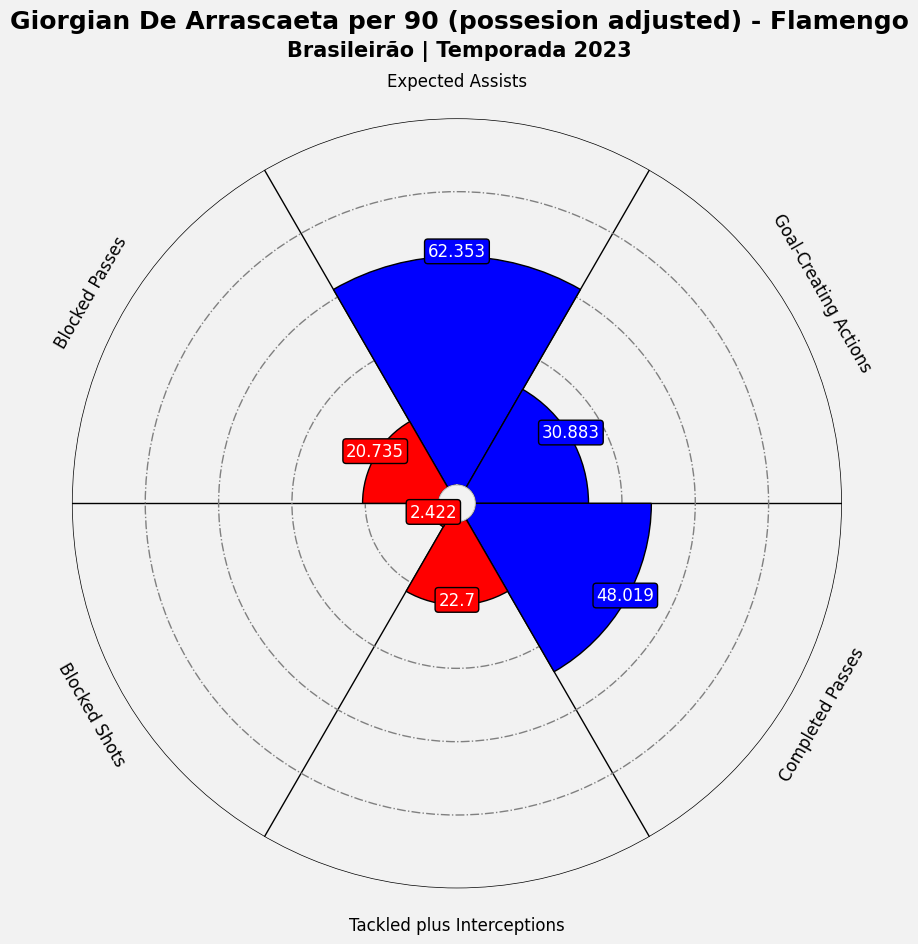

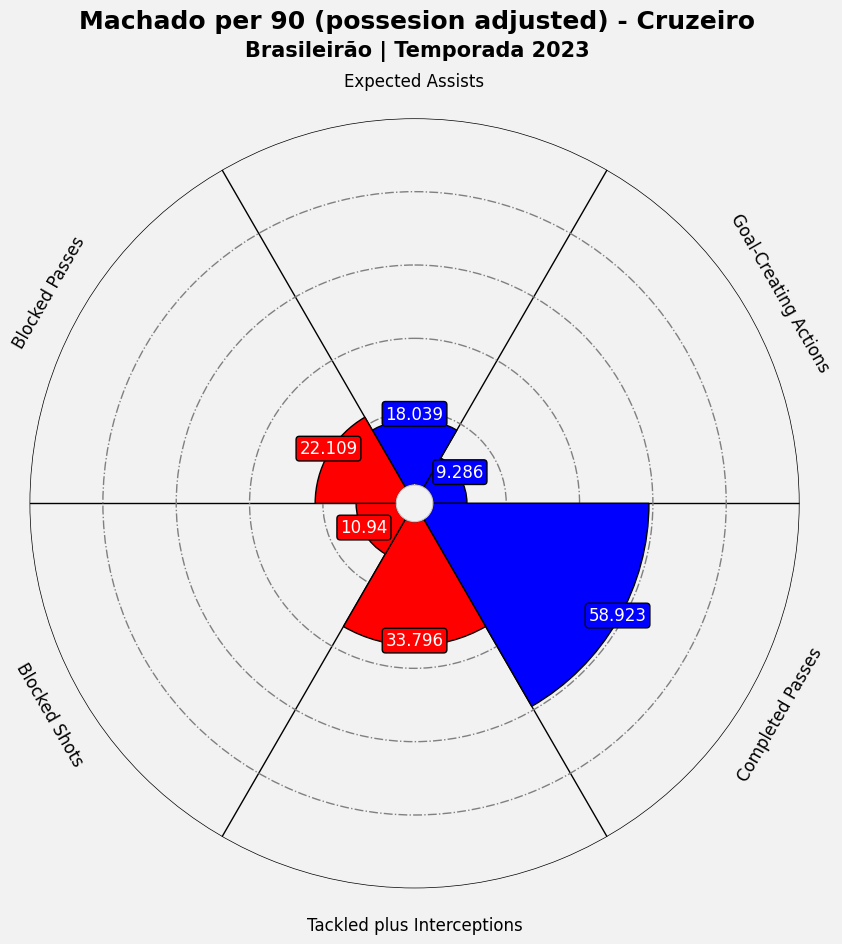

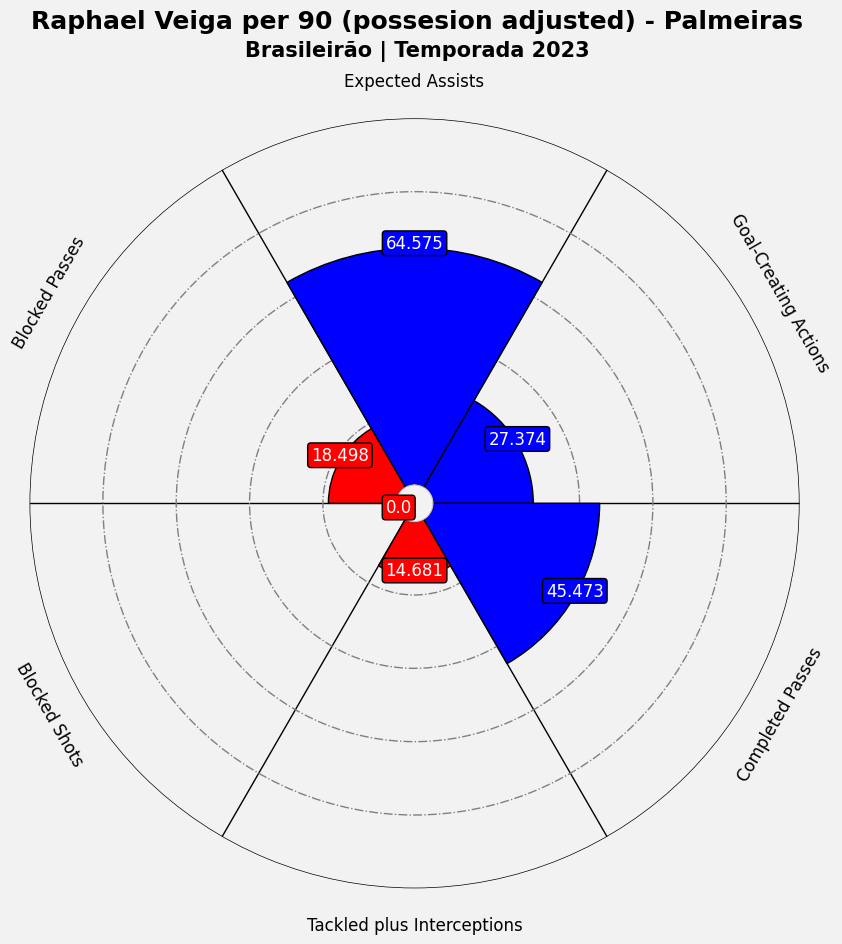

In [33]:
names = ["Expected Assists", "Goal-Creating Actions", "Completed Passes", 
         "Tackled plus Interceptions", "Blocked Shots", "Blocked Passes"]
slice_colors = ["blue"] + ["blue"] + ["blue"] + ["red"] + ["red"] + ["red"]
text_colors = ["white"] * 6

font_normal = fm.FontProperties(family='sans-serif', style='normal', weight='normal', size=12)
font_bold = fm.FontProperties(family='sans-serif', style='normal', weight='bold', size=12)

baker = PyPizza(
    params=names,
    min_range=None, 
    max_range=None, 
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1,
    other_circle_ls="-."
)

for i, jogador in enumerate(dados_meio['Player']):
    fig, ax = baker.make_pizza(
        percentiles_meio[i],
        figsize=(10, 10),
        param_location=110,
        slice_colors=slice_colors,
        value_colors=text_colors,
        value_bck_colors=slice_colors,
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal, va="center"  #
        ),
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )
    )    
    time = str(dados_meio.query(f"Player == '{jogador}'")['Squad'].values[0])
    fig.text(
        0.515, 0.97, f"{jogador} per 90 (possesion adjusted) - {time}",
        size=18, ha="center", fontproperties=font_bold, color="#000000"
    )

    fig.text(
        0.515, 0.942,
        "Brasileirão | Temporada 2023",
        size=15, ha="center", fontproperties=font_bold, color="#000000"
    )

    plt.show()

#### Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.

    As taxas ofensivas são representadas em vermelho e as defensivas em azul. É interessante notar que Machado é um jogador significativamente mais defensivo em comparação com os outros dois, enquanto Arrascaeta e Veiga são peças-chave em passes e ações que aumentam as chances de marcar gols. Machado possui taxas defensivas um pouco melhores do que os outros dois, porém, essa melhoria não é tão significativa quando comparada à enorme diferença no aspecto ofensivo. Arrascaeta e Veiga provavelmente precisam jogar em equipes capazes de garantir a linha defensiva sem depender muito deles, considerando sua forte inclinação para o jogo ofensivo e sua menor ênfase na parte defensiva.

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

    Para avaliar o desempenho de um zagueiro, escolhi analisar os seguintes atributos da temporada do Campeonato Brasileiro de 2023:

- **Cmp.3** Como zagueiro, é crucial que o jogador acerte passes longos que tirem a bola do campo defensivo. Portanto, é importante analisar a quantidade de passes longos certos.
- **Err** Como zagueiro, é crucial que sejam feitos poucos erros, tendo em vista que eles podem ser custosos. Portanto, é importante analisar a quantidade de erros.
- **Clr** Como zagueiro, é crucial que o jogador consiga afastar o perigo. Portanto, é importante analisar a quantidade de vezes que ele fez isso.
- **Tkl+Int** Como zagueiro, é crucial que o jogador tenha atitudes defensivas. Portanto, é importante analisar a quantidade de desarmes e intercepções.
- **Sh** Como zagueiro, é crucial que o jogador tenha atitudes defensivas. Portanto, é importante analisar a quantidade de chutes bloqueados.
- **Pass** Como zagueiro, é crucial que o jogador tenha atitudes defensivas. Portanto, é importante analisar a quantidade de passes bloqueados.

    A escala é em porcentagem, comparada com o maior valor desse atributo presente na tabela, excluindo os jogadores que jogaram menos de 360 horas. Para isso, foi realizada uma normalização multiplicando o valor por 100 para obter a porcentagem. A normalização foi realizada com base no tempo em que o time está com a posse de bola.

In [34]:
analise_zaga_aux = pd.merge(data_defense[['Rk','Squad','Player','Err','Clr','Tkl+Int','Sh','Pass']] , data_pass[['Rk','Cmp.3']], on='Rk')
analise_zaga = pd.merge(analise_zaga_aux, posse_time_jogador_jogo[['Rk','Min']], on='Rk')

analise_zaga[["Cmp.3","Err","Clr","Tkl+Int","Sh","Pass","Min"]] = analise_zaga[["Cmp.3","Err","Clr","Tkl+Int","Sh","Pass","Min"]].astype(float)

analise_zaga = analise_zaga.query("Min >= 2.0").reset_index(drop=True)
analise_zaga

,Rk,Squad,Player,Err,Clr,Tkl+Int,Sh,Pass,Cmp.3,Min
0,1,Bahia,Nicolás Acevedo,1.0,22.0,99.0,1.0,30.0,82.0,10.878778
1,2,Internacional,Luiz Adriano,0.0,18.0,21.0,2.0,7.0,6.0,7.625333
2,4,Botafogo (RJ),Adryelson,2.0,202.0,95.0,30.0,13.0,148.0,16.012000
3,5,Corinthians,Adson,0.0,1.0,41.0,2.0,14.0,21.0,4.646889
4,9,Corinthians,Yuri Alberto,0.0,17.0,26.0,2.0,21.0,12.0,14.759333
...,...,...,...,...,...,...,...,...,...,...
486,745,Goiás,Willian,1.0,61.0,104.0,15.0,15.0,99.0,10.867556
487,747,Fluminense,Samuel Xavier,0.0,32.0,45.0,12.0,15.0,59.0,14.428111
488,748,Bahia,Yago,1.0,14.0,61.0,2.0,20.0,46.0,7.526778
489,750,Ath Paranaense,Bruno Zapelli,0.0,3.0,23.0,1.0,16.0,48.0,6.159556


In [35]:
analise_zaga[["Cmp.3","Err","Clr","Tkl+Int","Sh","Pass"]] = (analise_zaga[["Cmp.3","Err","Clr","Tkl+Int","Sh","Pass"]].div(analise_zaga["Min"], axis=0)).round(3)
maximos = analise_zaga[["Cmp.3","Err","Clr","Tkl+Int","Sh","Pass"]].max()
analise_zaga[["Cmp.3","Err","Clr","Tkl+Int","Sh","Pass"]] = (analise_zaga[["Cmp.3","Err","Clr","Tkl+Int","Sh","Pass"]].div(maximos)*100).round(3)

analise_zaga

,Rk,Squad,Player,Err,Clr,Tkl+Int,Sh,Pass,Cmp.3,Min
0,1,Bahia,Nicolás Acevedo,14.375,12.613,56.441,2.621,61.099,29.490,10.878778
1,2,Internacional,Luiz Adriano,0.000,14.728,17.081,7.464,20.337,3.079,7.625333
2,4,Botafogo (RJ),Adryelson,19.531,78.698,36.798,53.390,17.988,36.161,16.012000
3,5,Corinthians,Adson,0.000,1.341,54.723,12.251,66.748,17.679,4.646889
4,9,Corinthians,Yuri Alberto,0.000,7.186,10.928,3.875,31.524,3.181,14.759333
...,...,...,...,...,...,...,...,...,...,...
486,745,Goiás,Willian,14.375,35.013,59.356,39.316,30.572,35.640,10.867556
487,747,Fluminense,Samuel Xavier,0.000,13.836,19.345,23.704,23.039,15.997,14.428111
488,748,Bahia,Yago,20.781,11.603,50.264,7.578,58.861,23.911,7.526778
489,750,Ath Paranaense,Bruno Zapelli,0.000,3.038,23.159,4.615,57.554,30.488,6.159556


In [36]:
dados_zaga = analise_zaga.query("Player == 'Murilo Cerqueira' or Player == 'Fabrício Bruno' or Player == 'Neris'")
dados_zaga

,Rk,Squad,Player,Err,Clr,Tkl+Int,Sh,Pass,Cmp.3,Min
60,98,Flamengo,Fabrício Bruno,7.969,47.308,23.203,37.949,15.884,44.501,19.516000
86,138,Palmeiras,Murilo Cerqueira,0.000,38.875,27.886,38.205,13.979,45.362,12.677333
322,496,Cruzeiro,Neris,12.969,50.558,33.858,21.197,14.665,38.179,12.091111


In [37]:
colunas_numericas_3 = dados_zaga[["Err","Clr","Tkl+Int","Sh","Pass","Cmp.3"]]
percentiles_zag = colunas_numericas_3.values.tolist()
percentiles_zag

[[7.969, 47.308, 23.203, 37.949, 15.884, 44.501],
 [0.0, 38.875, 27.886, 38.205, 13.979, 45.362],
 [12.969, 50.558, 33.858, 21.197, 14.665, 38.179]]

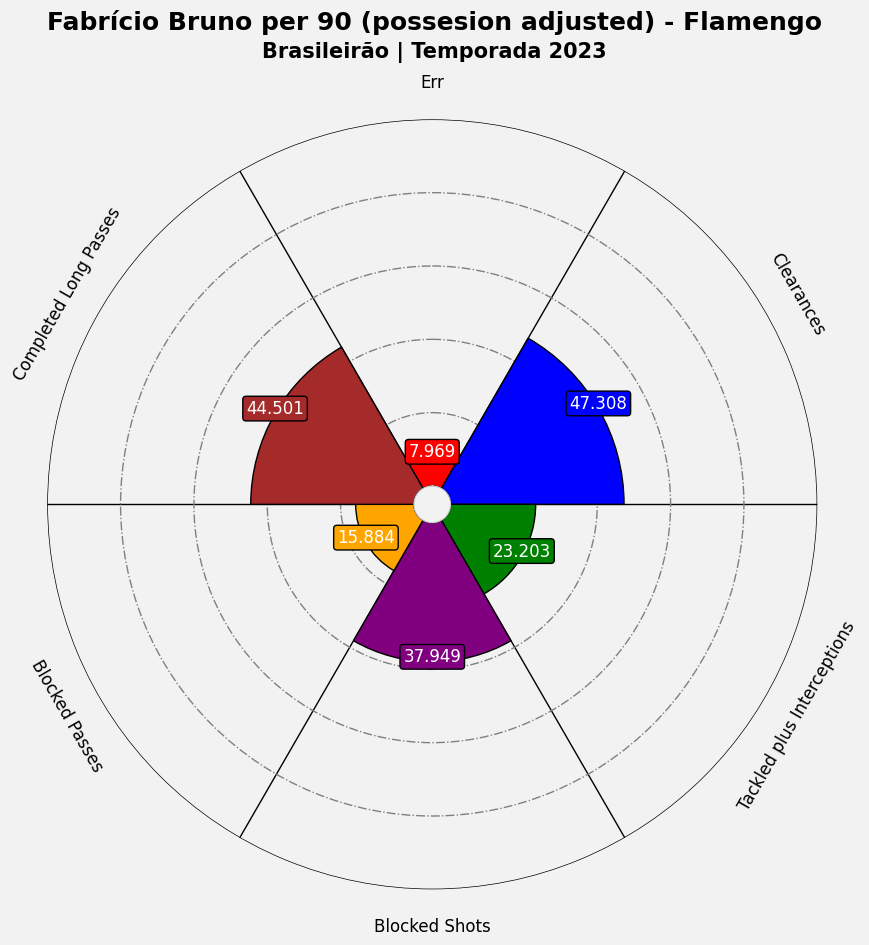

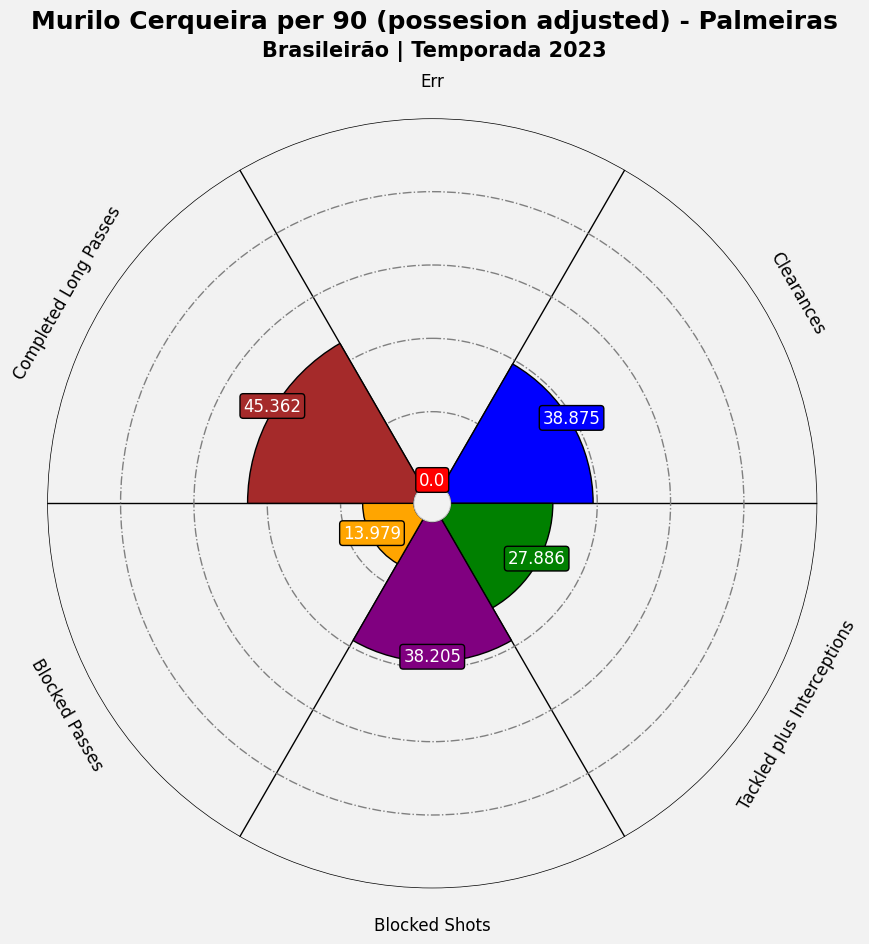

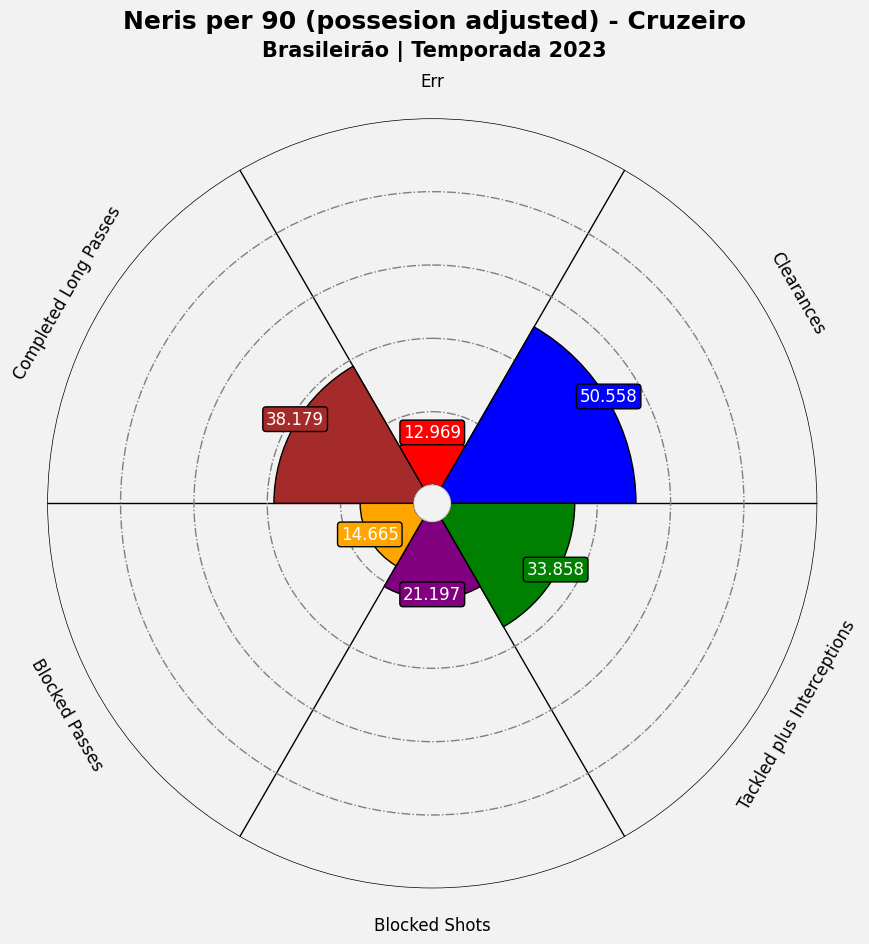

In [38]:
names = ["Err","Clearances", "Tackled plus Interceptions", "Blocked Shots", "Blocked Passes", "Completed Long Passes", ]
slice_colors = ["red"] + ["blue"] + ["green"] + ["purple"] + ["orange"] + ["brown"]
text_colors = ["white"] * 6

font_normal = fm.FontProperties(family='sans-serif', style='normal', weight='normal', size=12)
font_bold = fm.FontProperties(family='sans-serif', style='normal', weight='bold', size=12)

baker = PyPizza(
    params=names,
    min_range=None, 
    max_range=None, 
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1,
    other_circle_ls="-."
)

for i, jogador in enumerate(dados_zaga['Player']):
    fig, ax = baker.make_pizza(
        percentiles_zag[i],
        figsize=(10, 10),
        param_location=110,
        slice_colors=slice_colors,
        value_colors=text_colors,
        value_bck_colors=slice_colors,
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal, va="center"  #
        ),
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )
    )    
    time = str(dados_zaga.query(f"Player == '{jogador}'")['Squad'].values[0])
    fig.text(
        0.515, 0.97, f"{jogador} per 90 (possesion adjusted) - {time}",
        size=18, ha="center", fontproperties=font_bold, color="#000000"
    )

    fig.text(
        0.515, 0.942,
        "Brasileirão | Temporada 2023",
        size=15, ha="center", fontproperties=font_bold, color="#000000"
    )

    plt.show()

#### Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.

    A quantidade de erros cometidos por Neris e Bruno é consideravelmente alta, e mesmo pequenos equívocos podem resultar em gols do time adversário, complicando a situação da equipe no campeonato. O jogador mais completo parece ser Murilo, pois seus valores em todos os aspectos são relativamente bons, necessitando apenas de mais jogadas defensivas para afastar a bola da área. Neris parece ser sólido defensivamente, com taxas baixas apenas de chutes bloqueados e passes longos completados. Bruno também é bastante completo, mas deixa a desejar em erros, desarmes e interceptações.Em geral, aparentam ser bons jogadores defensivamente.

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

    A posição de meio de campo é interessante porque combina características defensivas e ofensivas, resultando em uma mistura intrigante que utiliza aspectos tanto da análise da defesa quanto do ataque. Uma característica comum a todas é a importância dos passes precisos: na defesa, para desarmar e sair jogando; no ataque, para criar oportunidades de gol; e no meio-campo, para controlar o jogo ou iniciar jogadas ofensivas. Em relação aos jogadores, a maioria estava dentro das minhas expectativas, exceto Neris, que me surpreendeu, já que, sendo torcedor do Cruzeiro, esperava estatísticas menos favoráveis com base nos jogos que tenho visto. A posição mais desafiadora de avaliar foi a do meio de campo, devido à presença de meio-campistas com características tanto ofensivas quanto defensivas. Esta complexidade exige uma compreensão detalhada das características de cada meio-campista antes da análise, tornando-a menos generalizada e mais complexa. 